<style>
      h3 {
        color: green;
        font-weight: bold;
      }
</style>
### Author: Chetand777

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

### 1) Data Understanding & Preprocessing

In [2]:
# Loading the iris data
data = pd.read_csv('F:\Projects\Sparks-Foundation-Task-2-Unsupervised-Learning\data\Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Checking the shape of the dataset
data.shape

(150, 6)

In [4]:
# General Inspection of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Checking for missing values present
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# Checking for duplicate rows 
data.duplicated().sum()

0

In [7]:
# Statistical distribution of data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# Drop Id col
data.drop('Id', axis=1, inplace=True)

In [9]:
# Lets plot the boxplot for each of independent numerical feature to check outliers
for col in data.columns:
  if pd.api.types.is_numeric_dtype(data[col]):
    fig = go.Figure()
    fig.add_trace(go.Box(x=data[col], name=col, marker=dict(color='sienna')))
    fig.update_layout(
      title=f'Statistical Distribution of {col}',
      xaxis_title=col,
      yaxis_title='values',
      boxmode='group',
      width=800,
      height=400
    )

    fig.show()

In [10]:
# Lets remove the outliers present in SepalWidthCm col
Q1, Q3 = np.percentile(data['SepalWidthCm'], (25, 75))
IQR = Q3 - Q1
upper_fence = Q3 + 1.5*(IQR)
lower_fence = Q1 - 1.5*(IQR)
data['SepalWidthCm'] = data['SepalWidthCm'].apply(lambda x: upper_fence if x> upper_fence else lower_fence if x< lower_fence else x)

# Lets check it's distribution again
if pd.api.types.is_numeric_dtype(data['SepalWidthCm']):
  fig = go.Figure()
  fig.add_trace(go.Box(x=data['SepalWidthCm'], name='SepalWidthCm', marker=dict(color='sienna')))
  fig.update_layout(
    title='Statistical Distribution of SepalWidthCm',
    xaxis_title='SepalWidthCm',
    yaxis_title='values',
    boxmode='group',
    width=800,
    height=400
  )

  fig.show()

### 2) EDA

In [11]:
# Lets check the spacies column's unique values
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
# Now value counts of each of these groups
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [13]:
# For each of these spacies, lets check the distribution w.r.t sepal length-width & petal length-width
import seaborn as sns

for col in data.columns[:-1]:

  fig = go.Figure()

  for species in data['Species'].unique():
    species_data = data.loc[data['Species'] == species][col]
    fig.add_trace(go.Histogram(x=species_data, histfunc='count', name=species, opacity=0.6))

  fig.update_layout(
    title=f'Distribution of {col} w.r.t Species',
    xaxis_title=col,
    yaxis_title='Count',
    barmode='overlay',
    width=800,
    height=400
  )

  fig.show()

### 3) Model Building 

In [14]:
# Initialize kmeans algorithm
from sklearn.cluster import KMeans
SSD = []
for k in range(1, 10):
  kmeans = KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(data.drop('Species', axis=1))
  SSD.append(kmeans.inertia_)

# Plot the Elbow curve method to find optimal no of clusters
df = pd.DataFrame({'clusters': range(1, 10), 'SSD': SSD})
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['clusters'], y=df['SSD'], mode='lines', marker=dict(color='sienna')))

fig.update_layout(
  title='Elbow Curve Method',
  xaxis_title='No of Clusters',
  yaxis_title='SSD (inertia)',
  width=700,
  height=500
)

fig.show()

  File "f:\Projects\Sparks-Foundation-Task-2-Unsupervised-Learning\ULvenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [15]:
# Reinitialize kmeans with optimal no of clusters 3 to find cluster centroids & labels
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(data.drop('Species', axis=1))
print(kmeans.cluster_centers_)
print()
print(kmeans.labels_)

[[5.006      3.407      1.464      0.244     ]
 [5.9016129  2.74919355 4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [16]:
# Add new column in our data i.e cluster labels
data['clusters'] = kmeans.labels_
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [17]:
# Lets plot 3D clusters using scatterplot
sep_width = data['SepalWidthCm']
sep_len = data['SepalLengthCm']
cluster = data['clusters']
centroids = kmeans.cluster_centers_

fig = go.Figure(data=[
    go.Scatter3d(  
        x=sep_len,
        y=sep_width,
        z=cluster,
        mode='markers',
        marker=dict(
            size=5,
            color=cluster
        ),
        name='Data Points'
    ),

    go.Scatter3d(
        x=centroids[:, 0],
        y=centroids[:, 1],
        z=[i*0.995 for i in range(len(centroids))],
        mode='markers',
        marker=dict(
            size=10,
            color='red',
            symbol='circle'
        ),
        name='Centroids'
    )
])

fig.update_layout(
  title='Predicted Clusters',
  scene=dict(
    xaxis_title='SepalLengthCm',
    yaxis_title='SepalWidthCm',
    zaxis_title='Clusters'
  ),
  legend_title_text='Elements',
  legend=dict(x=0.8, y=1),
  width=800,
  height=500
)

fig.show()

In [18]:
# No of datapoints correctly grouped by model
print(f'Iris-setosa data points correctly identified by model: {data.loc[data['Species'] == 'Iris-setosa']['clusters'].value_counts()}')

print(f'Iris-versicolor data points correctly identified by model: {data.loc[data['Species'] == 'Iris-versicolor']['clusters'].value_counts()}')

print(f'Iris-virginica data points correctly identified by model: {data.loc[data['Species'] == 'Iris-virginica']['clusters'].value_counts()}')

Iris-setosa data points correctly identified by model: clusters
0    50
Name: count, dtype: int64
Iris-versicolor data points correctly identified by model: clusters
1    48
2     2
Name: count, dtype: int64
Iris-virginica data points correctly identified by model: clusters
2    36
1    14
Name: count, dtype: int64


In [21]:
# Lets encode species as 0: Iris-setosa, 1: Iris-versicolor, 2: Iris-virginica in data
data['encoded_species'] = data['Species'].apply(lambda x: 0 if x=='Iris-setosa' else 1 if x=='Iris-versicolor' else 2)

# Check the performance of model using classification report
from sklearn.metrics import *
print(classification_report(data['encoded_species'], data['clusters']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



<Axes: >

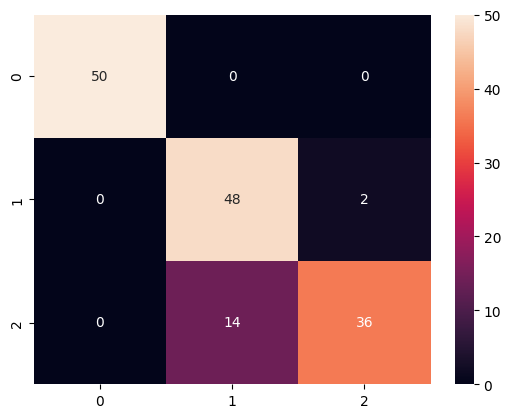

In [22]:
# Lets plot the confusion matrix
sns.heatmap(confusion_matrix(data['encoded_species'], data['clusters']), annot=True)

<style>
      h3 {
        color: green;
        font-weight: bold;
      }
</style>
### Model performs very well on class 0, achieving perfect precision and recall. It also exhibits good performance on class 1, with a slight bias towards identifying true positives. However, for class 2, the model struggles a bit with recall, missing some relevant data points.